<a href="https://colab.research.google.com/github/carlo-coding/curso_deep_learning/blob/main/Training_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential, datasets
import matplotlib.pyplot as plt
import numpy as np

### Cargando el conjunto de datos fashion mnist

In [7]:
fashion_mnist = datasets.fashion_mnist
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

In [8]:
x_train = x_train.astype("float64")
x_test = x_test.astype("float64")

x_train /= 255.0
x_test /= 255.0

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [9]:
class_names = [
  "T-shirt/top",
  "Trouser",
  "Pullover",
  "Dress",
  "Coat",
  "Sandal",
  "Shirt",
  "Sneaker",
  "Bag",
  "Ankle boot"
]

### Visualización de las primeras 50 imagenes de entrenamiento

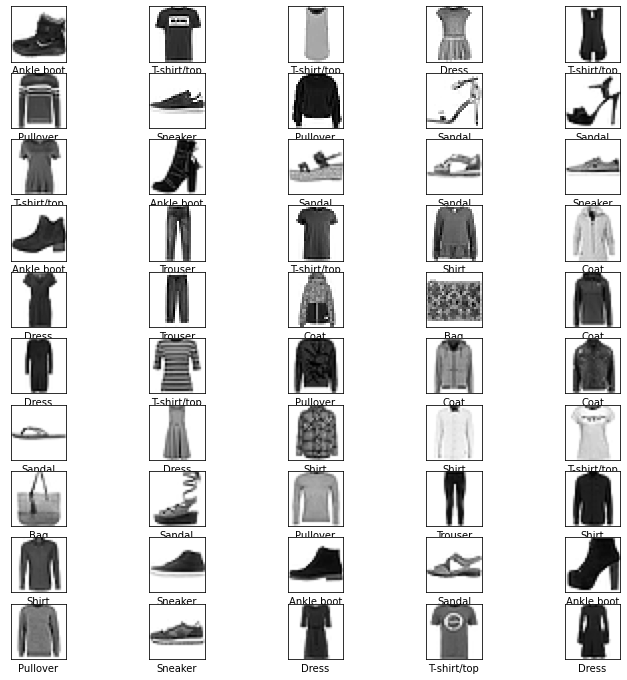

In [12]:
plt.figure(figsize=(12,12))
for i in range(50):
  plt.subplot(10, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

### Definiendo el modelo

In [50]:

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))   # Flatten es la capa de entrada de datos que aplana el array, no entrena ningún parametro
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

model.compile(
    optimizer="adam",     # Cambiamos el optimizer de sdg a adam que ajusta mejor los parametros
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento del modelo

In [51]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0462 - accuracy: 0.7021
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5785 - accuracy: 0.7984
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4961 - accuracy: 0.8255
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4554 - accuracy: 0.8434
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4315 - accuracy: 0.8498
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4166 - accuracy: 0.8548
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4062 - accuracy: 0.8581
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3973 - accuracy: 0.8607
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3921 - accuracy: 0.8612
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.386

### Evaluación y mejora del modelo

In [52]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión del modelo: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.4303 - accuracy: 0.8493
Precisión del modelo: 0.8493000268936157


In [53]:
predictions = model.predict(x_test)

In [54]:
print(f"Prediction: {class_names[np.argmax(predictions[5])]}")
print(f"Original: {class_names[y_test[5]]}")

Prediction: Trouser
Original: Trouser


In [55]:
# Función para evaluar el desempeño de una red neuronal
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if (predicted_label == true_label):
    color = "blue"
  else:
    color = "red"
  
  plt.xlabel("{} {:2.0f}% {}".format(
      class_names[predicted_label],
      100*np.max(predictions_array),
      class_names[true_label],
      color=color
  ))

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]

  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color="#007700")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("black")



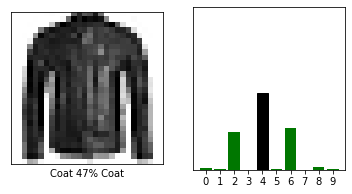

In [62]:
i = 50
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], y_test)
plt.show()